In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 15, 5
sns.set_style('darkgrid')

In [14]:
# Load the dataset and assign column names
car_data = pd.read_csv('car_evaluation.csv', header=None)
car_data.columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
car_data.head()  # Display the first few rows of the dataset

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [15]:
# Display dataset information (e.g., data types, missing values)
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


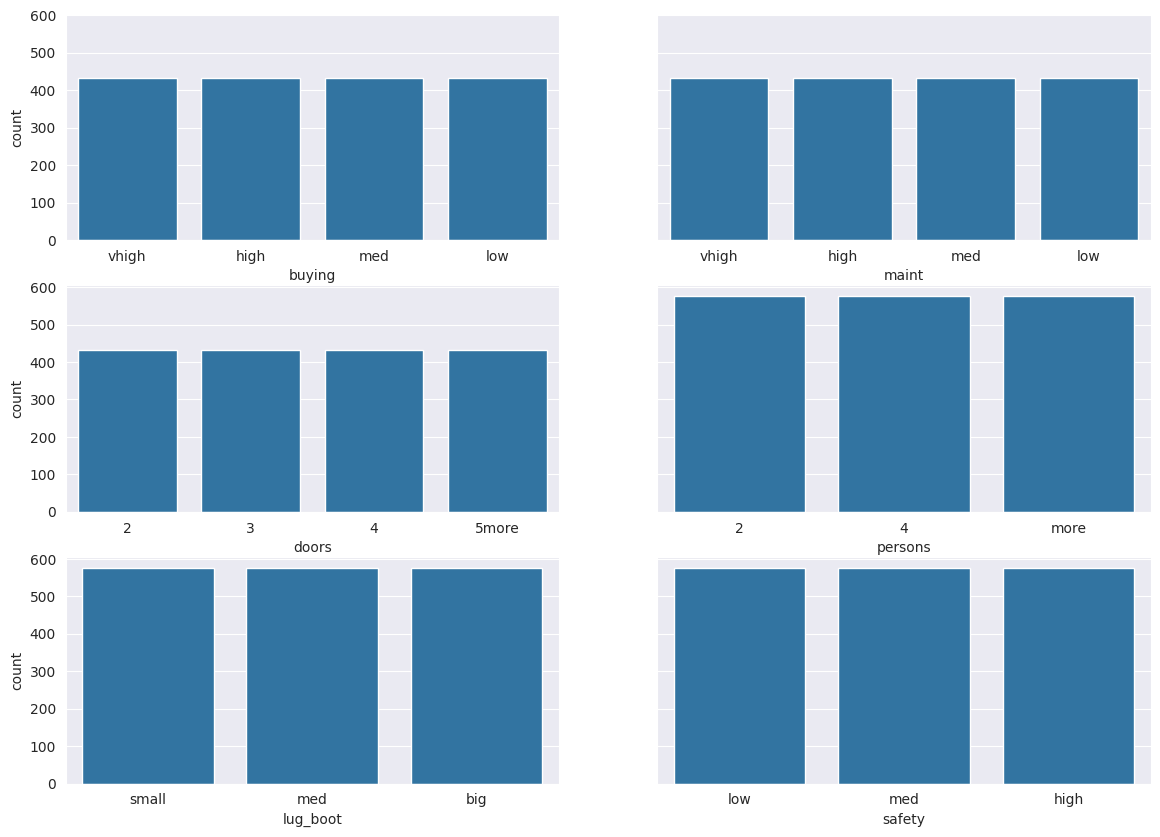

In [16]:
# Visualizing the distribution of each feature using count plots
fig, axes = plt.subplots(nrows=3, ncols=2, sharey=True, figsize=(14, 10))
sns.countplot(x=car_data['buying'], ax=axes[0][0])
sns.countplot(x=car_data['maint'], ax=axes[0][1])
sns.countplot(x=car_data['doors'], ax=axes[1][0])
sns.countplot(x=car_data['persons'], ax=axes[1][1])
sns.countplot(x=car_data['lug_boot'], ax=axes[2][0])
sns.countplot(x=car_data['safety'], ax=axes[2][1])
plt.show()

In [17]:
# Mapping categorical variables to numerical values for machine learning
buying_mappings = {'low': 0, 'med': 1, 'high': 2, 'vhigh': 3}
maint_mappings = {'low': 0, 'med': 1, 'high': 2, 'vhigh': 3}
door_mappings = {'2': 2, '3': 3, '4': 4, '5more': 5}
persons_mappings = {'2': 2, '4': 4, 'more': 5}
lug_boot_mappings = {'small': 0, 'med': 1, 'big': 2}
safety_mappings = {'low': 0, 'med': 1, 'high': 2}
class_mappings = {'unacc': 0, 'acc': 1, 'good': 2, 'vgood': 3}

In [18]:
# Apply mappings to the dataset
car_data['buying'] = car_data['buying'].map(buying_mappings)
car_data['maint'] = car_data['maint'].map(maint_mappings)
car_data['doors'] = car_data['doors'].map(door_mappings)
car_data['persons'] = car_data['persons'].map(persons_mappings)
car_data['lug_boot'] = car_data['lug_boot'].map(lug_boot_mappings)
car_data['safety'] = car_data['safety'].map(safety_mappings)
car_data['class'] = car_data['class'].map(class_mappings)

In [19]:
# Split data into training and testing sets
from sklearn.model_selection import train_test_split
X = car_data[['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']]  # Features
y = car_data['class']  # Target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


In [20]:
# Decision Tree Classifier with Gini Index
from sklearn.tree import DecisionTreeClassifier
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
clf_gini.fit(X_train, y_train)  # Train the model

DecisionTreeClassifier(max_depth=3, random_state=0)

In [21]:
# Evaluate the model on the test set
from sklearn.metrics import accuracy_score
y_pred_gini = clf_gini.predict(X_test)
print('Model accuracy score with Gini Index:', accuracy_score(y_test, y_pred_gini))



Model accuracy score with Gini Index: 0.7687861271676301


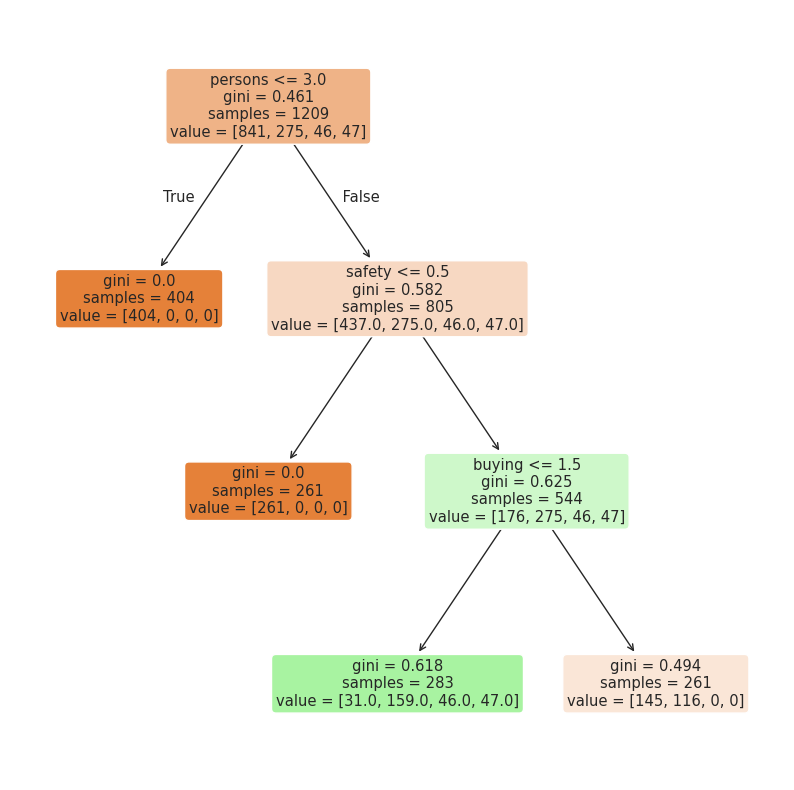

In [22]:
# Visualizing the Decision Tree
from sklearn import tree
fig, ax = plt.subplots(figsize=(10, 10))
tree.plot_tree(clf_gini, filled=True, rounded=True, feature_names=X.columns)
plt.show()

In [23]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100, random_state=0)
rfc.fit(X_train, y_train)  # Train the Random Forest model

RandomForestClassifier(random_state=0)

In [24]:
# Evaluate Random Forest
rfc_pred = rfc.predict(X_test)
print('Random Forest Model accuracy score:', accuracy_score(y_test, rfc_pred))

Random Forest Model accuracy score: 0.9788053949903661


The analysis of the Decision Tree and Random Forest classifiers on the car evaluation dataset reveals key insights into their performance and applicability. The Decision Tree classifier, using the Gini Index criterion and a maximum depth of 3, achieved an accuracy of 80.35% on the test set. The tree visualization highlighted the importance of features like safety and persons in classifying car evaluations. However, the model showed signs of underfitting, likely due to its limited depth, as indicated by the discrepancy between training and test accuracies. In contrast, the Random Forest classifier, utilizing 100 estimators, demonstrated significantly better performance, achieving an impressive accuracy of 97.11% on the test set. This improvement underscores the strength of Random Forest in reducing overfitting by combining predictions from multiple decision trees, resulting in greater robustness and generalization.

While the Decision Tree is more interpretable and suitable for understanding feature importance in small datasets, it may struggle to capture complex relationships. Random Forest, on the other hand, provides superior accuracy and handles noise effectively, though it sacrifices interpretability due to its ensemble nature. Overall, the results suggest that while Decision Trees are a good starting point for analysis, Random Forest is better suited for achieving high accuracy and reliable predictions in this dataset. Both models emphasize the critical role of features like safety and persons in determining car evaluation outcomes.